<a href="https://colab.research.google.com/github/sazuniga06/Practice/blob/main/Def_Funciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
#Importar Librerias
import numpy as np
import random as rd
import math as mt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
from scipy.integrate import quad

# Funciones de Física en Python

En este Notebook se presentan 10 funciones diseñadas para cálculos y conceptos físicos y matematicos, junto con una función extra que fusiona múltiples listas eliminando elementos duplicados. Cada función incluye:
- Descripción de su propósito.
- Parámetros y valor de retorno.
- Ejemplos de Uso


In [5]:
#1. Funcion para realizar el calculo de la energia cinetica de un objeto
def Kinetic(Mass: float,Speed: float, AngularSpeed: float, MomentumI: float):

    '''Calcula la energia cinetica total de un objeto en movimiento y rotacion
    Mass: Masa del objeto en Kg
    Speed: Velocidad lineal del objeto en m/s
    AngularSpeed: Velocidad angular del objeto en rad/s
    MomentumI: Momento de inercia del objeto en Kg*m^2
    '''

    K = 1/2*Mass*Speed**2
    Kr = 1/2*MomentumI*AngularSpeed**2
    Kt = K + Kr
    return Kt

#Ejemplo 1
a = Kinetic(10,20,10,4)
print("El objeto tiene una energia cinetica de: ", a , "Joules")
#Ejemplo 2
b = Kinetic(5,10,5,2)
print("El objeto tiene una energia cinetica de: ", b , "Joules")
#Ejemplo 3
c = Kinetic(2,5,2,1)
print("El objeto tiene una energia cinetica de: ", c , "Joules")

El objeto tiene una energia cinetica de:  2200.0 Joules
El objeto tiene una energia cinetica de:  275.0 Joules
El objeto tiene una energia cinetica de:  27.0 Joules


In [7]:
#2. Cálculo de la resistencia total de un circuito en serie o paralelo
def Resistance(resistances: list, configuration: str):
    '''Calcula la resistencia total de un circuito en serie o paralelo.

    Parameters:
    resistances (list): Lista con las resistencias del circuito en Ohms.
    configuration (str): Tipo de conexión del circuito ('serie' o 'paralelo').

    Returns:
    float: Resistencia total del circuito.
    '''

    configuration = configuration.lower()  # Convertir a minúsculas para evitar errores

    if configuration == "serie":
        return sum(resistances)

    elif configuration == "paralelo":
        inversa = 0
        for r in resistances:
            if r == 0:
                raise ValueError("La resistencia no puede ser cero en paralelo.")
            inversa += 1 / r
        if inversa == 0:
            raise ValueError("Suma de inversos es cero, verificar resistencias.")
        return 1 / inversa

    else:
        raise ValueError("Tipo de conexión no válido. Use 'serie' o 'paralelo'.")

# Ejemplo 1
lista = [10, 20, 30, 40]

# Cálculo en serie
b = Resistance(lista, "Serie")
print("La resistencia total del circuito en serie es:", b, "Ohms")

# Cálculo en paralelo
c = Resistance(lista, "Paralelo")
print("La resistencia total del circuito en paralelo es:", c, "Ohms")

# Ejemplo 2
lista = [5, 10, 15, 20]

# Cálculo en serie
d = Resistance(lista, "Serie")
print("La resistencia total del circuito en serie es:", d, "Ohms")

# Cálculo en paralelo
e = Resistance(lista, "Paralelo")
print("La resistencia total del circuito en paralelo es:", e, "Ohms")

# Ejemplo 3
lista = [2, 4, 6, 8]

# Cálculo en serie
f = Resistance(lista, "Serie")
print("La resistencia total del circuito en serie es:", f, "Ohms")

# Cálculo en paralelo
g = Resistance(lista, "Paralelo")


La resistencia total del circuito en serie es: 100 Ohms
La resistencia total del circuito en paralelo es: 4.8 Ohms
La resistencia total del circuito en serie es: 50 Ohms
La resistencia total del circuito en paralelo es: 2.4 Ohms
La resistencia total del circuito en serie es: 20 Ohms


In [9]:
#3. Funcion para calcular el momento relativista
def calcular_momento_relativista(masa: float, velocidad: float):
    """
    Calcula el momentum relativista:
      p = gamma * masa * velocidad, donde gamma = 1/sqrt(1 - (v/c)²)
    y c es la velocidad de la luz (299792458 m/s).

    Parámetros:
      - masa: en kg.
      - velocidad: en m/s (debe ser menor que c).

    Retorna:
      - Momentum relativista en kg·m/s.
    """
    c = 299792458  # m/s
    if abs(velocidad) >= c:
        raise ValueError("La velocidad debe ser menor que la velocidad de la luz.")
    gamma = 1 / mt.sqrt(1 - (velocidad / c) ** 2)
    return gamma * masa * velocidad

# Ejemplo 1
a = calcular_momento_relativista(0.2, 100000)
print("El momentum relativista es:", a, "kg·m/s")

# Ejemplo 2
b = calcular_momento_relativista(0.5, 200000)
print("El momentum relativista es:", b, "kg·m/s")

# Ejemplo 3
c = calcular_momento_relativista(0.8, 300000)
print("El momentum relativista es:", c, "kg·m/s")

El momentum relativista es: 20000.001112650152 kg·m/s
El momentum relativista es: 100000.02225300854 kg·m/s
El momentum relativista es: 240000.1201662963 kg·m/s


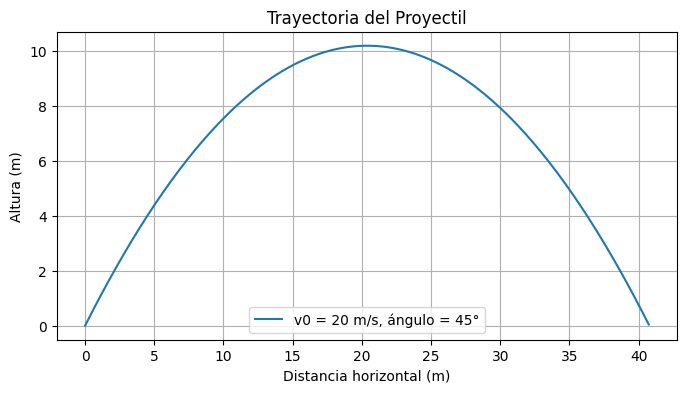

Altura máxima: 10.193667298172567 m
Alcance: 40.729350596344894 m


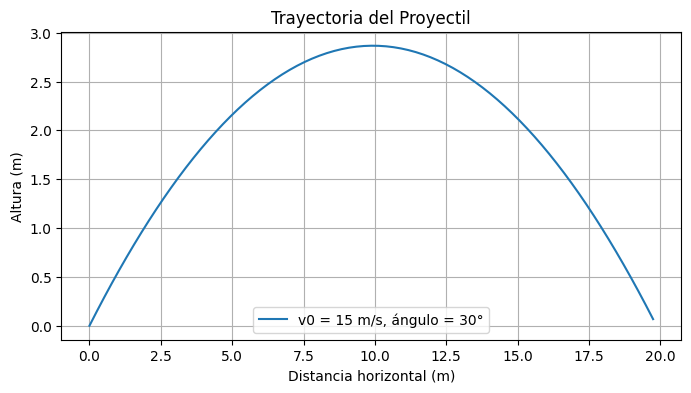

Altura máxima: 2.8668719999999994 m
Alcance: 19.745379206285218 m


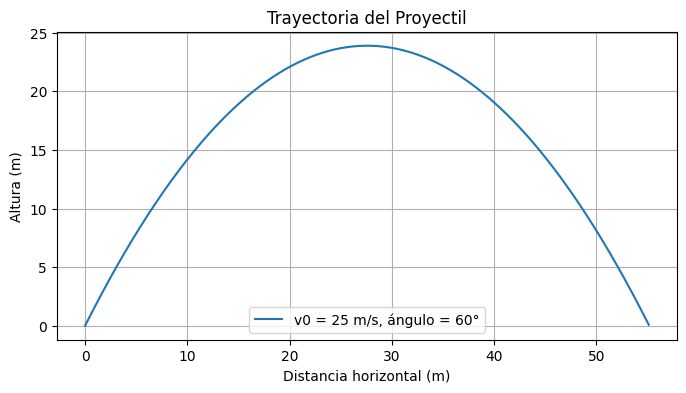

Altura máxima: 23.89139305909023 m
Alcance: 55.124999999999396 m


In [11]:
#4. Funcion para calcular la trayectoria de un proyectil
def lanzamiento_proyectil(velocidad_inicial: float, angulo: float):
    """
    Simula la trayectoria de un proyectil usando las fórmulas de la cinemática:
      - velocidad_inicial: velocidad inicial en m/s.
      - angulo: ángulo de lanzamiento en grados.
      - g: aceleración debida a la gravedad (m/s²). Por defecto 9.81.

    Retorna un diccionario con:
      - 'tiempo': lista de tiempos.
      - 'x': lista de posiciones horizontales.
      - 'y': lista de posiciones verticales.
      - 'max_altura': altura máxima alcanzada.
      - 'alcance': distancia horizontal total.

    Además, grafica la trayectoria (x vs. y).
    """
    gravedad = 9.81
    angulo_rad = mt.radians(angulo)
    vx = velocidad_inicial * mt.cos(angulo_rad)
    vy = velocidad_inicial * mt.sin(angulo_rad)

    tiempos = []
    x_posiciones = []
    y_posiciones = []

    t = 0
    x = 0
    y = 0
    max_altura = 0
    dt = 0.01

    while y >= 0:
        tiempos.append(t)
        x_posiciones.append(x)
        y_posiciones.append(y)

        if y > max_altura:
            max_altura = y

        t += dt
        x = vx * t
        y = vy * t - 0.5 * gravedad * t ** 2

    alcance = x_posiciones[-1]

    # Graficar la trayectoria
    plt.figure(figsize=(8, 4))
    plt.plot(x_posiciones, y_posiciones, label=f"v0 = {velocidad_inicial} m/s, ángulo = {angulo}°")
    plt.title("Trayectoria del Proyectil")
    plt.xlabel("Distancia horizontal (m)")
    plt.ylabel("Altura (m)")
    plt.legend()
    plt.grid(True)
    plt.show()

    return {
        "tiempo": tiempos,
        "x": x_posiciones,
        "y": y_posiciones,
        "max_altura": max_altura,
        "alcance": alcance
    }

# Ejemplo 1
resultado = lanzamiento_proyectil(20, 45)
print("Altura máxima:", resultado["max_altura"], "m")
print("Alcance:", resultado["alcance"], "m")

# Ejemplo 2
resultado = lanzamiento_proyectil(15, 30)
print("Altura máxima:", resultado["max_altura"], "m")
print("Alcance:", resultado["alcance"], "m")

# Ejemplo 3
resultado = lanzamiento_proyectil(25, 60)
print("Altura máxima:", resultado["max_altura"], "m")
print("Alcance:", resultado["alcance"], "m")



Gráfica 1: Caida Libre


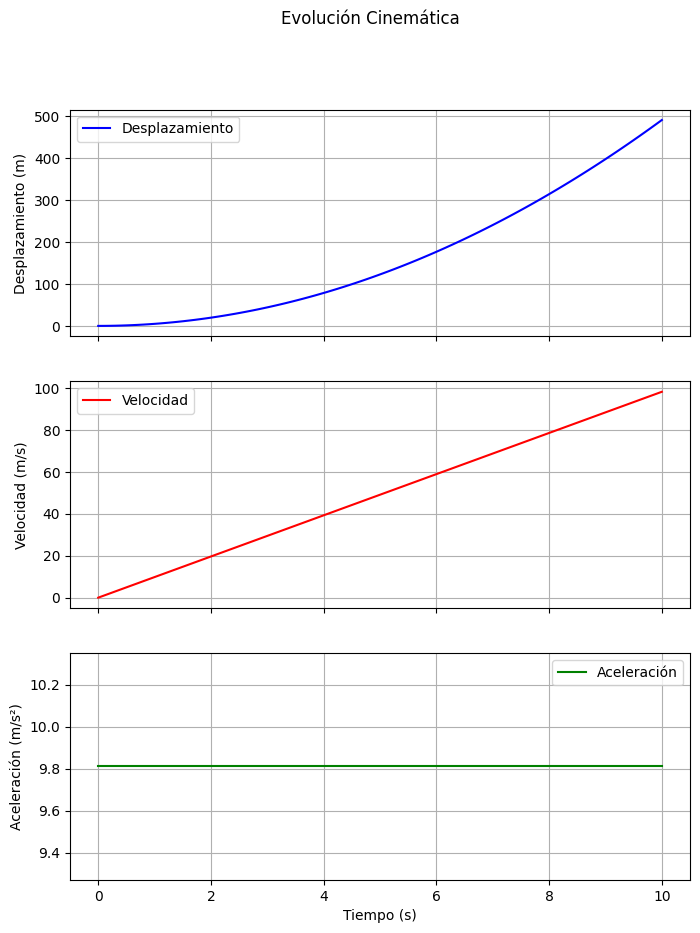

Gráfica 2: Movimiento Rectilíneo Uniforme


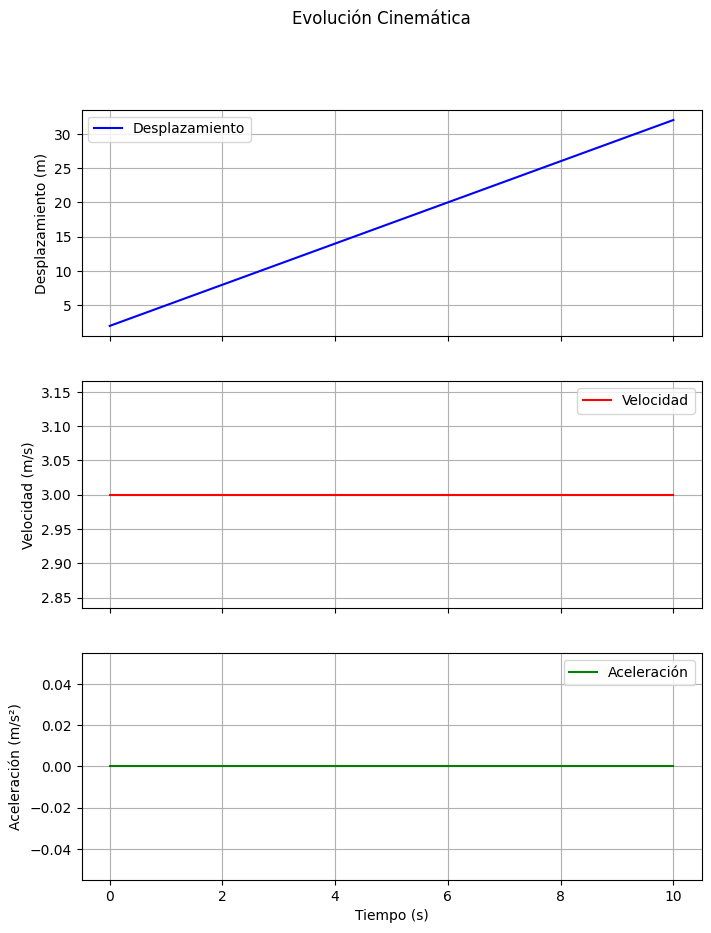

Gráfica 3: Movimiento Rectilíneo Uniformemente Acelerado


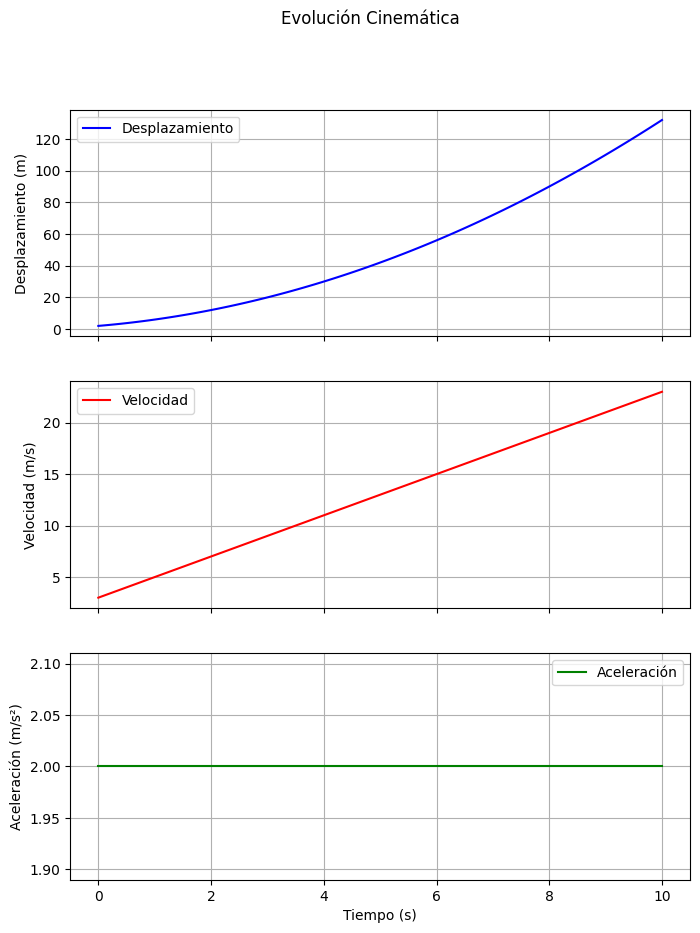

In [13]:
#5. Funcion para observar la cinematica de un objeto
def graficar_cinematica(datos):
    """
    Recibe un diccionario 'datos' que debe tener las claves:
      - 'tiempo': lista de tiempos.
      - 'desplazamiento': lista de posiciones.
      - 'velocidad': lista de velocidades.
      - 'aceleracion': lista de aceleraciones.

    Genera tres subgráficas para visualizar:
      - Desplazamiento vs. Tiempo.
      - Velocidad vs. Tiempo.
      - Aceleración vs. Tiempo.
    """
    tiempo = datos.get("tiempo", [])
    desplazamiento = datos.get("desplazamiento", [])
    velocidad = datos.get("velocidad", [])
    aceleracion = datos.get("aceleracion", [])

    fig, axs = plt.subplots(3, 1, figsize=(8, 10), sharex=True)

    axs[0].plot(tiempo, desplazamiento, 'b-', label="Desplazamiento")
    axs[0].set_ylabel("Desplazamiento (m)")
    axs[0].legend()
    axs[0].grid(True)

    axs[1].plot(tiempo, velocidad, 'r-', label="Velocidad")
    axs[1].set_ylabel("Velocidad (m/s)")
    axs[1].legend()
    axs[1].grid(True)

    axs[2].plot(tiempo, aceleracion, 'g-', label="Aceleración")
    axs[2].set_xlabel("Tiempo (s)")
    axs[2].set_ylabel("Aceleración (m/s²)")
    axs[2].legend()
    axs[2].grid(True)

    plt.suptitle("Evolución Cinemática")
    plt.show()

# Ejemplo 1
# Se simula una caída libre (sin velocidad inicial) con g = 9.81 m/s^2
tiempos = np.linspace(0, 10, 100)
desplazamiento = 0.5*9.81*tiempos**2
velocidad = 9.81*tiempos
aceleracion = [9.81]*len(tiempos)

datos_cinematica = {
    "tiempo": tiempos,
    "desplazamiento": desplazamiento,
    "velocidad": velocidad,
    "aceleracion": aceleracion
}

print("Gráfica 1: Caida Libre")
graficar_cinematica(datos_cinematica)

# Ejemplo 2
# Movimiento rectilíneo uniforme (MRU)
tiempos = np.linspace(0, 10, 100)
desplazamiento = 2 + 3*tiempos
velocidad = [3]*len(tiempos)
aceleracion = [0]*len(tiempos)

datos_cinematica = {
    "tiempo": tiempos,
    "desplazamiento": desplazamiento,
    "velocidad": velocidad,
    "aceleracion": aceleracion
}

print("Gráfica 2: Movimiento Rectilíneo Uniforme")
graficar_cinematica(datos_cinematica)

# Ejemplo 3
# Movimiento rectilíneo uniformemente acelerado (MRUA)
tiempos = np.linspace(0, 10, 100)
desplazamiento = 2 + 3*tiempos + 0.5*2*tiempos**2
velocidad = 3 + 2*tiempos
aceleracion = [2]*len(tiempos)

datos_cinematica = {
    "tiempo": tiempos,
    "desplazamiento": desplazamiento,
    "velocidad": velocidad,
    "aceleracion": aceleracion
}

print("Gráfica 3: Movimiento Rectilíneo Uniformemente Acelerado")
graficar_cinematica(datos_cinematica)


Ejemplo 1: Integración de sin(x) en [0, π/2] (método 'right')


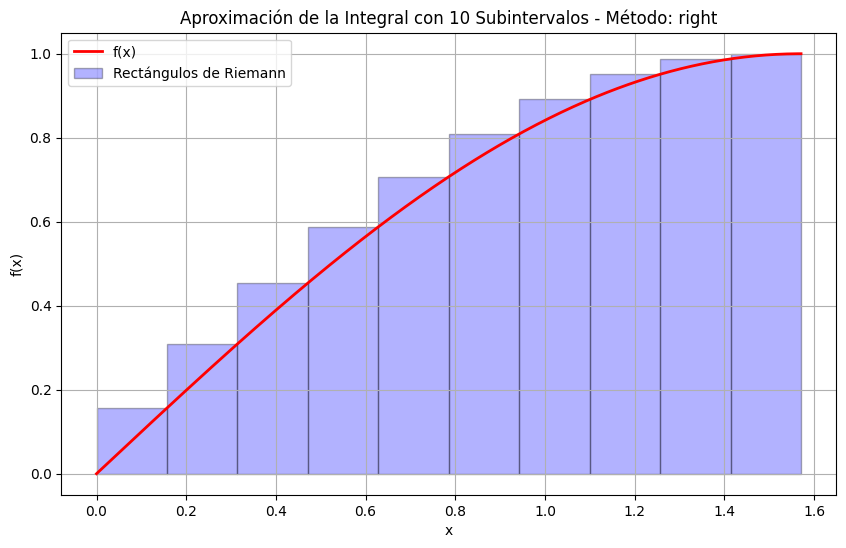

Suma de Riemann (right, n=10): 1.076482802694102
Ejemplo 2: Integración de x^2 en [0, 1] (método 'left')


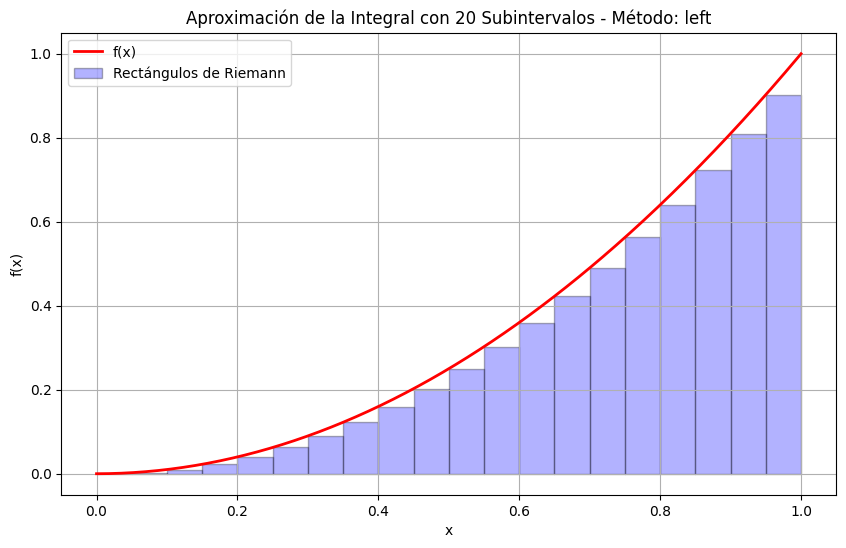

Suma de Riemann (left, n=20): 0.30874999999999997
Ejemplo 3: Integración de exp(-x^2) en [-1, 1] (método 'midpoint')


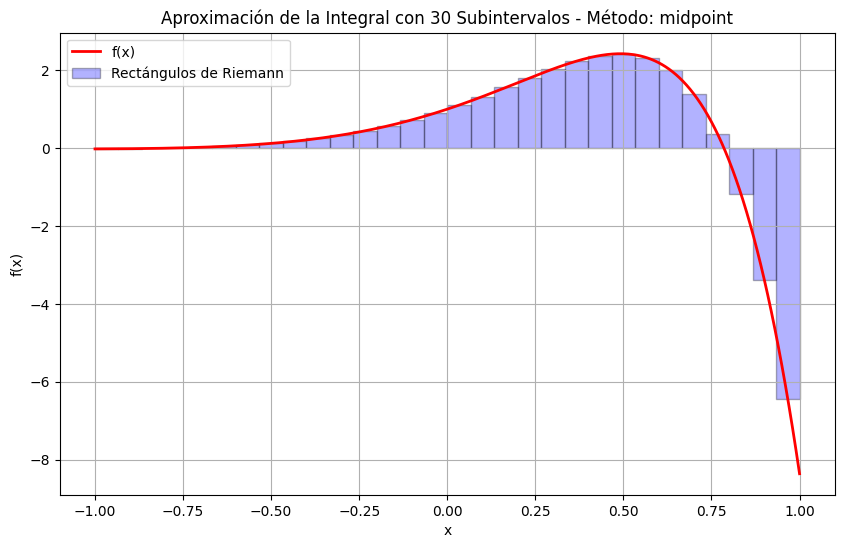

Suma de Riemann (midpoint, n=30): 0.9040528689613032


In [20]:
#6. Calculo del Area bajo la curva utilizando suma de Riemann

import numpy as np
import matplotlib.pyplot as plt

def riemann_sum(f, a, b, n, method='midpoint'):
    """
    Calcula la integral de f(x) en [a, b] usando sumas de Riemann y grafica la función junto con los rectángulos.

    Parámetros:
        f: función a integrar (debe aceptar un array de numpy).
        a, b: límites de integración.
        n: número de subintervalos.
        method: 'left', 'right' o 'midpoint' (tipo de suma de Riemann).

    Retorna:
        Aproximación del área bajo la curva.
    """
    # Cálculo del ancho de cada subintervalo.
    dx = (b - a) / n

    # Determinación de los puntos donde evaluar f(x) según el método.
    if method == 'left':
        x_rect = np.linspace(a, b - dx, n)
    elif method == 'right':
        x_rect = np.linspace(a + dx, b, n)
    elif method == 'midpoint':
        x_rect = np.linspace(a + dx/2, b - dx/2, n)
    else:
        raise ValueError("El método debe ser 'left', 'right' o 'midpoint'.")

    y_rect = f(x_rect)
    integral = np.sum(y_rect * dx)

    # Generar la gráfica de la función y los rectángulos de Riemann.
    x_dense = np.linspace(a, b, 400)
    y_dense = f(x_dense)

    plt.figure(figsize=(10, 6))
    plt.plot(x_dense, y_dense, 'r-', label='f(x)', linewidth=2)

    for i in range(n):
        # Determinar la posición inicial del rectángulo según el método
        if method == 'left':
            x_start = x_rect[i]
        elif method == 'right':
            x_start = x_rect[i] - dx
        else:  # midpoint
            x_start = x_rect[i] - dx/2

        # Etiquetar solo el primer rectángulo para la leyenda
        if i == 0:
            plt.fill_between([x_start, x_start + dx],
                             [y_rect[i], y_rect[i]],
                             color='blue', alpha=0.3, edgecolor='black',
                             label='Rectángulos de Riemann')
        else:
            plt.fill_between([x_start, x_start + dx],
                             [y_rect[i], y_rect[i]],
                             color='blue', alpha=0.3, edgecolor='black')

    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title(f'Aproximación de la Integral con {n} Subintervalos - Método: {method}')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"Suma de Riemann ({method}, n={n}): {integral}")
    return integral


if __name__ == '__main__':
    # Ejemplo 1: Integración de sin(x) en [0, π/2] usando el método 'right'
    print("Ejemplo 1: Integración de sin(x) en [0, π/2] (método 'right')")
    f1 = lambda x: np.sin(x)
    riemann_sum(f1, 0, np.pi/2, 10, method='right')

    # Ejemplo 2: Integración de x^2 en [0, 1] usando el método 'left'
    print("Ejemplo 2: Integración de x^2 en [0, 1] (método 'left')")
    f2 = lambda x: x**2
    riemann_sum(f2, 0, 1, 20, method='left')

    # Ejemplo 3: Integración de exp(-x^2) en [-1, 1] usando el método 'midpoint'
    print("Ejemplo 3: Integración de exp(-x^2) en [-1, 1] (método 'midpoint')")
    f3 = lambda x: np.exp(3*x)*np.cos(2x)
    riemann_sum(f3, -1, 1, 30, method='midpoint')



Analizando Partículas - Ejemplo 1:


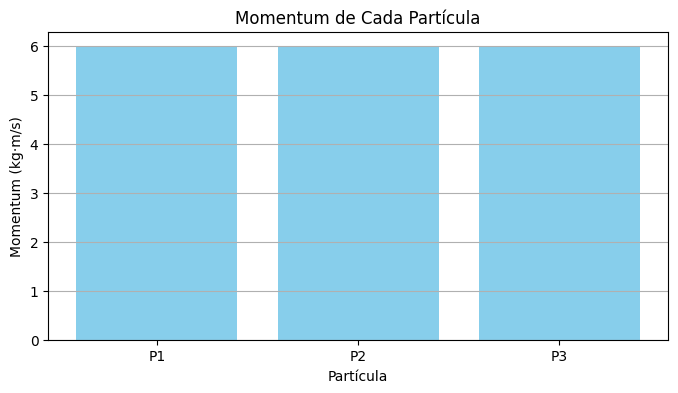

{'nombre': 'P1', 'masa': 2.0, 'velocidad': 3.0, 'momentum': 6.0, 'energia_cinetica': 9.0}
{'nombre': 'P2', 'masa': 1.5, 'velocidad': 4.0, 'momentum': 6.0, 'energia_cinetica': 12.0}
{'nombre': 'P3', 'masa': 3.0, 'velocidad': 2.0, 'momentum': 6.0, 'energia_cinetica': 6.0}

Analizando Partículas - Ejemplo 2:


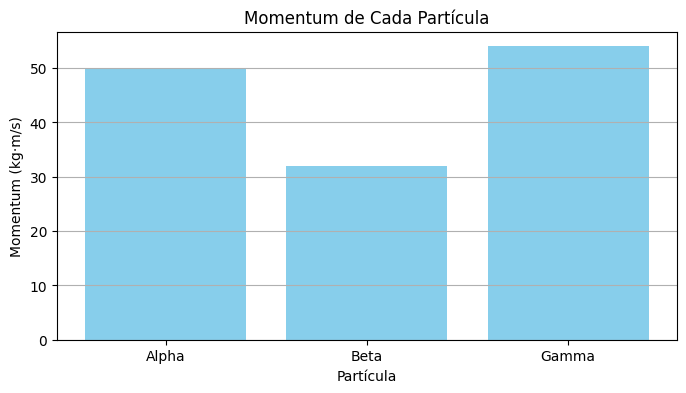

{'nombre': 'Alpha', 'masa': 5.0, 'velocidad': 10.0, 'momentum': 50.0, 'energia_cinetica': 250.0}
{'nombre': 'Beta', 'masa': 4.0, 'velocidad': 8.0, 'momentum': 32.0, 'energia_cinetica': 128.0}
{'nombre': 'Gamma', 'masa': 6.0, 'velocidad': 9.0, 'momentum': 54.0, 'energia_cinetica': 243.0}

Analizando Partículas - Ejemplo 3:


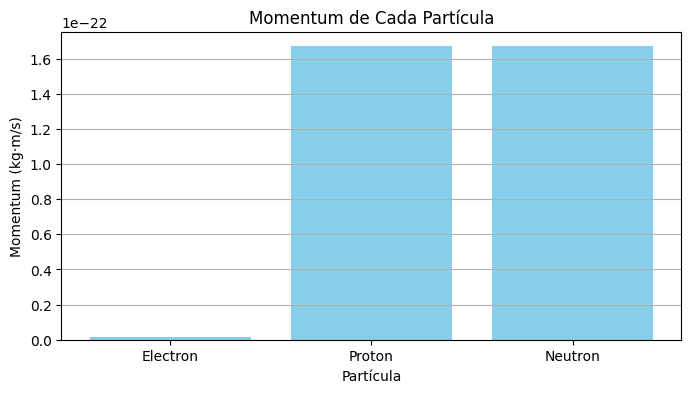

{'nombre': 'Electron', 'masa': 9.11e-31, 'velocidad': 2000000.0, 'momentum': 1.822e-24, 'energia_cinetica': 1.822e-18}
{'nombre': 'Proton', 'masa': 1.67e-27, 'velocidad': 100000.0, 'momentum': 1.6700000000000001e-22, 'energia_cinetica': 8.350000000000001e-18}
{'nombre': 'Neutron', 'masa': 1.67e-27, 'velocidad': 100000.0, 'momentum': 1.6700000000000001e-22, 'energia_cinetica': 8.350000000000001e-18}


In [23]:
#7. Simulacion de Particulas
def analizar_particulas(lista_particulas, graficar=True):
    """
    A partir de una lista de diccionarios, donde cada diccionario representa una partícula con:
      - 'nombre': cadena con el nombre de la partícula.
      - 'masa': masa en kg.
      - 'velocidad': velocidad en m/s.

    La función calcula para cada partícula:
      - Momentum: p = masa * velocidad.
      - Energía cinética: E = 0.5 * masa * velocidad².

    Retorna una lista de diccionarios con la información original y los nuevos cálculos.

    Si 'graficar' es True, genera una gráfica de barras mostrando el momentum de cada partícula.

    """
    resultados = []
    nombres = []
    momenta = []

    for particula in lista_particulas:
        nombre = particula.get("nombre", "Desconocido")
        masa = particula.get("masa", 0)
        velocidad = particula.get("velocidad", 0)
        momentum = masa * velocidad
        energia_cinetica = 0.5 * masa * velocidad**2

        particula_resultado = {
            "nombre": nombre,
            "masa": masa,
            "velocidad": velocidad,
            "momentum": momentum,
            "energia_cinetica": energia_cinetica
        }
        resultados.append(particula_resultado)
        nombres.append(nombre)
        momenta.append(momentum)

    if graficar:
        plt.figure(figsize=(8,4))
        plt.bar(nombres, momenta, color='skyblue')
        plt.title("Momentum de Cada Partícula")
        plt.xlabel("Partícula")
        plt.ylabel("Momentum (kg·m/s)")
        plt.grid(axis="y")
        plt.show()

    return resultados


# Ejemplo 1: Tres partículas con diferentes masas y velocidades
particulas1 = [
    {"nombre": "P1", "masa": 2.0, "velocidad": 3.0},
    {"nombre": "P2", "masa": 1.5, "velocidad": 4.0},
    {"nombre": "P3", "masa": 3.0, "velocidad": 2.0}
]

print("Analizando Partículas - Ejemplo 1:")
resultados1 = analizar_particulas(particulas1)
for r in resultados1:
    print(r)
print("")

# Ejemplo 2: Partículas simulando colisiones o desaceleraciones
particulas2 = [
    {"nombre": "Alpha", "masa": 5.0, "velocidad": 10.0},
    {"nombre": "Beta", "masa": 4.0, "velocidad": 8.0},
    {"nombre": "Gamma", "masa": 6.0, "velocidad": 9.0}
]

print("Analizando Partículas - Ejemplo 2:")
resultados2 = analizar_particulas(particulas2)
for r in resultados2:
    print(r)
print("")

# Ejemplo 3: Lista de partículas con valores variados
particulas3 = [
    {"nombre": "Electron", "masa": 9.11e-31, "velocidad": 2e6},
    {"nombre": "Proton", "masa": 1.67e-27, "velocidad": 1e5},
    {"nombre": "Neutron", "masa": 1.67e-27, "velocidad": 1e5}
]

print("Analizando Partículas - Ejemplo 3:")
resultados3 = analizar_particulas(particulas3)
for r in resultados3:
    print(r)


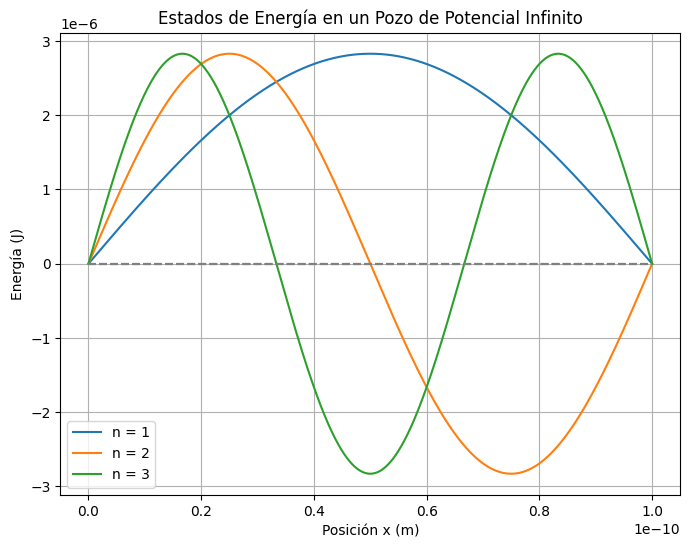

Ejemplo 1: Energías (en Joules):
Estado n=1: 6.025e-18 J   |   37.603 eV
Estado n=2: 2.410e-17 J   |   150.412 eV
Estado n=3: 5.422e-17 J   |   338.427 eV


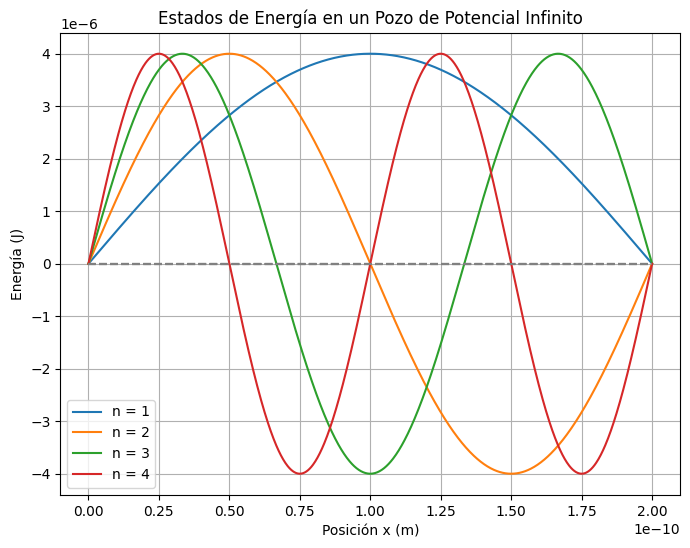


Ejemplo 2: Energías (en Joules):
Estado n=1: 8.203e-22 J   |   0.005 eV
Estado n=2: 3.281e-21 J   |   0.020 eV
Estado n=3: 7.383e-21 J   |   0.046 eV
Estado n=4: 1.312e-20 J   |   0.082 eV


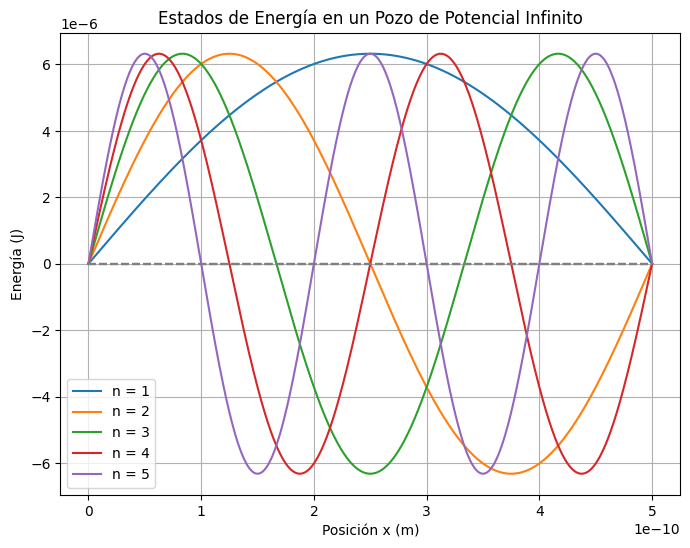


Ejemplo 3: Energías (en Joules):
Estado n=1: 4.390e-20 J   |   0.274 eV
Estado n=2: 1.756e-19 J   |   1.096 eV
Estado n=3: 3.951e-19 J   |   2.466 eV
Estado n=4: 7.025e-19 J   |   4.385 eV
Estado n=5: 1.098e-18 J   |   6.851 eV


In [26]:
#8. Simula Particula en Pozo de Potencial
def simular_estados_pozo_infinito(m, L, n_states, x_points=1000, hbar=1.054571817e-34):
    """
    Simula los estados de energía de una partícula en un pozo de potencial infinito.

    Parámetros:
      - m: masa de la partícula en kg.
      - L: ancho del pozo (m).
      - n_states: número de estados a simular (n = 1, 2, ..., n_states).
      - x_points: número de puntos para discretizar el eje x (por defecto 1000).
      - hbar: constante reducida de Planck (J·s, por defecto 1.054571817e-34).

    Calcula para cada estado n:
      - Energía: E_n = (n^2 * π^2 * ħ^2) / (2 * m * L^2)
      - Función de onda: ψ_n(x) = sqrt(2/L) * sin(n * π * x / L) para 0 < x < L

    Retorna un diccionario con:
      - 'x': arreglo de posiciones.
      - 'energies': lista de energías (Joules).
      - 'eigenfunc': lista de arrays con los valores de ψ_n(x).

    Además, grafica un diagrama de niveles donde se superponen las funciones de onda (escaladas)
    sobre sus niveles de energía.

    """
    # Discretizamos el eje x dentro del pozo [0, L]
    x = np.linspace(0, L, x_points)
    energies = []
    eigenfunc = []

    # Cálculo de energías y funciones de onda
    for n in range(1, n_states+1):
        E_n = (n**2 * np.pi**2 * hbar**2) / (2 * m * L**2)
        energies.append(E_n)
        psi_n = np.sqrt(2/L) * np.sin(n * np.pi * x / L)
        eigenfunc.append(psi_n)

    # Graficar las funciones de onda sobre sus niveles de energía.
    # Se usa un factor de escala para visualizar las funciones de onda
    scale = L / 5  # Factor arbitrario para la escala vertical de ψ(x)
    plt.figure(figsize=(8, 6))
    for n in range(n_states):
        plt.plot(x, eigenfunc[n] * scale + energies[n], label=f"n = {n+1}")
        # Línea horizontal que indica el nivel de energía E_n
        plt.hlines(energies[n], 0, L, linestyles="dashed", colors="gray")

    plt.title("Estados de Energía en un Pozo de Potencial Infinito")
    plt.xlabel("Posición x (m)")
    plt.ylabel("Energía (J)")
    plt.legend()
    plt.grid(True)
    plt.show()

    return {"x": x, "energies": energies, "eigenfunc": eigenfunc}

# Ejemplo 1: Partícula con masa de un electrón en un pozo de 0.1 nm de ancho
m_electron = 9.10938356e-31  # kg
L1 = 1e-10  # 0.1 nm en metros
result1 = simular_estados_pozo_infinito(m_electron, L1, n_states=3)
print("Ejemplo 1: Energías (en Joules):")
for i, E in enumerate(result1["energies"], start=1):
    print(f"Estado n={i}: {E:.3e} J   |   {(E/1.602176634e-19):.3f} eV")

# Ejemplo 2: Partícula con masa de un protón en un pozo de 0.2 nm de ancho
m_proton = 1.6726219e-27  # kg
L2 = 2e-10  # 0.2 nm
result2 = simular_estados_pozo_infinito(m_proton, L2, n_states=4)
print("\nEjemplo 2: Energías (en Joules):")
for i, E in enumerate(result2["energies"], start=1):
    print(f"Estado n={i}: {E:.3e} J   |   {(E/1.602176634e-19):.3f} eV")

# Ejemplo 3: Partícula de masa intermedia en un pozo de 0.5 nm de ancho
m_intermedia = 5e-30  # kg (valor arbitrario)
L3 = 5e-10  # 0.5 nm
result3 = simular_estados_pozo_infinito(m_intermedia, L3, n_states=5)
print("\nEjemplo 3: Energías (en Joules):")
for i, E in enumerate(result3["energies"], start=1):
    print(f"Estado n={i}: {E:.3e} J   |   {(E/1.602176634e-19):.3f} eV")

In [40]:
#9. Solidos de Revolucion

def solid_of_revolution_interactive(f, a, b, n_x=200, n_theta=100, f_prime=None):
    """
    Calcula el sólido de revolución generado al girar f(x) alrededor del eje x,
    calcula el volumen y área superficial, y genera una gráfica 3D interactiva con Plotly.

    Parámetros:
      - f: función f(x) definida en [a, b].
      - a, b: extremos del intervalo.
      - n_x: número de puntos para discretizar x.
      - n_theta: número de puntos para discretizar el ángulo θ (0 a 2π).
      - f_prime: función derivada de f(x) (opcional). Si None, se aproxima numéricamente.

    Retorna un diccionario con:
      - 'volume': volumen estimado.
      - 'surface_area': área superficial estimada.
      - 'X', 'Y', 'Z': mallas usadas para la visualización 3D.
    """
    # Discretizamos x y calculamos f(x)
    x = np.linspace(a, b, n_x)
    y = f(x)

    # Cálculo del volumen (método del trapecio)
    volume = np.pi * np.trapz(y**2, x)

    # Aproximar la derivada si no se provee f_prime
    if f_prime is None:
        dy_dx = np.gradient(y, x)
    else:
        dy_dx = f_prime(x)
    surface_area = 2 * np.pi * np.trapz(y * np.sqrt(1 + dy_dx**2), x)

    # Crear malla para el sólido de revolución
    theta = np.linspace(0, 2*np.pi, n_theta)
    X, Theta = np.meshgrid(x, theta)
    Y = f(X) * np.cos(Theta)
    Z = f(X) * np.sin(Theta)

    # Crear gráfica interactiva con Plotly
    fig = go.Figure(data=[go.Surface(x=X, y=Y, z=Z, colorscale='Viridis', showscale=True)])
    fig.update_layout(
        title=f"Sólido de Revolución generado al girar f(x) en [{a}, {b}]",
        scene=dict(
            xaxis_title="x",
            yaxis_title="y",
            zaxis_title="z"
        ),
        width=800,
        height=600
    )
    fig.show()

    print(f"Volumen estimado: {volume:.4f} unidades^3")
    print(f"Área superficial estimada: {surface_area:.4f} unidades^2")

    return {"volume": volume, "surface_area": surface_area, "X": X, "Y": Y, "Z": Z}


# Ejemplo 1: f(x) = sqrt(x) en el intervalo [0, 4]
def f1(x):
    return np.sqrt(x)

print("Ejemplo 1: f(x) = sqrt(x) en [0, 4]")
solid1 = solid_of_revolution_interactive(f1, a=0, b=4, n_x=300, n_theta=150)


# Ejemplo 2: f(x) = sin(x) en el intervalo [0, π]
def f2(x):
    return np.sin(x)

# Derivada exacta de sin(x)
def f2_prime(x):
    return np.cos(x)

print("\nEjemplo 2: f(x) = sin(x) en [0, π]")
solid2 = solid_of_revolution_interactive(f2, a=0, b=np.pi, n_x=300, n_theta=150, f_prime=f2_prime)


# Ejemplo 3: f(x) = exp(-x) en el intervalo [0, 2]
def f3(x):
    return np.exp(-x)

print("\nEjemplo 3: f(x) = exp(-x) en [0, 2]")
solid3 = solid_of_revolution_interactive(f3, a=0, b=2, n_x=300, n_theta=150)


Ejemplo 1: f(x) = sqrt(x) en [0, 4]


Volumen estimado: 25.1327 unidades^3
Área superficial estimada: 36.1761 unidades^2

Ejemplo 2: f(x) = sin(x) en [0, π]


Volumen estimado: 4.9348 unidades^3
Área superficial estimada: 14.4234 unidades^2

Ejemplo 3: f(x) = exp(-x) en [0, 2]


Volumen estimado: 1.5420 unidades^3
Área superficial estimada: 6.3589 unidades^2


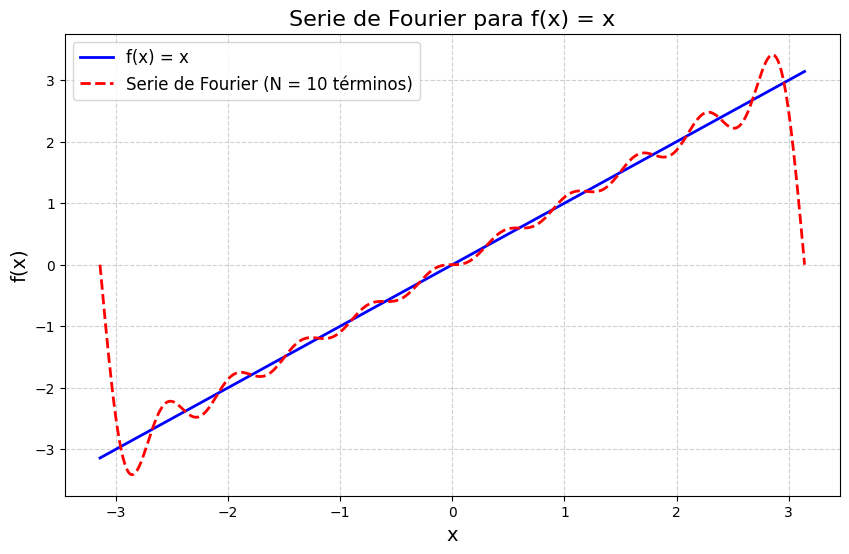

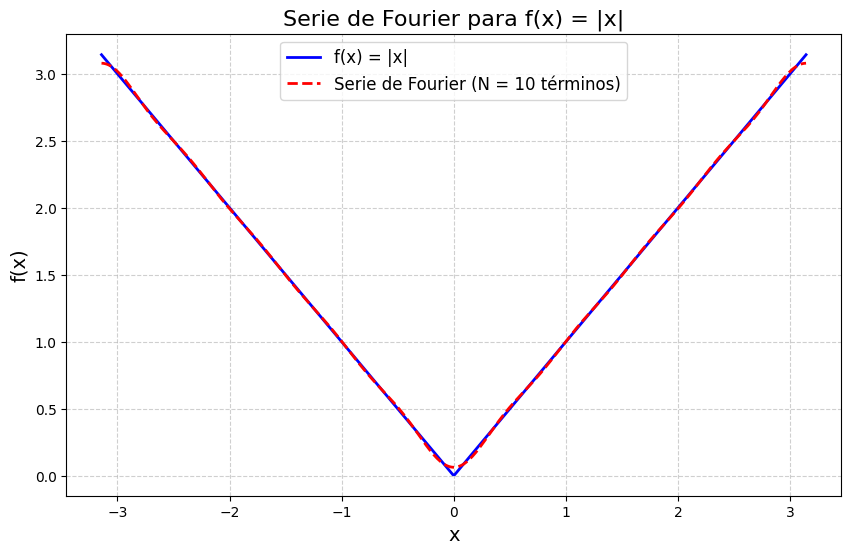

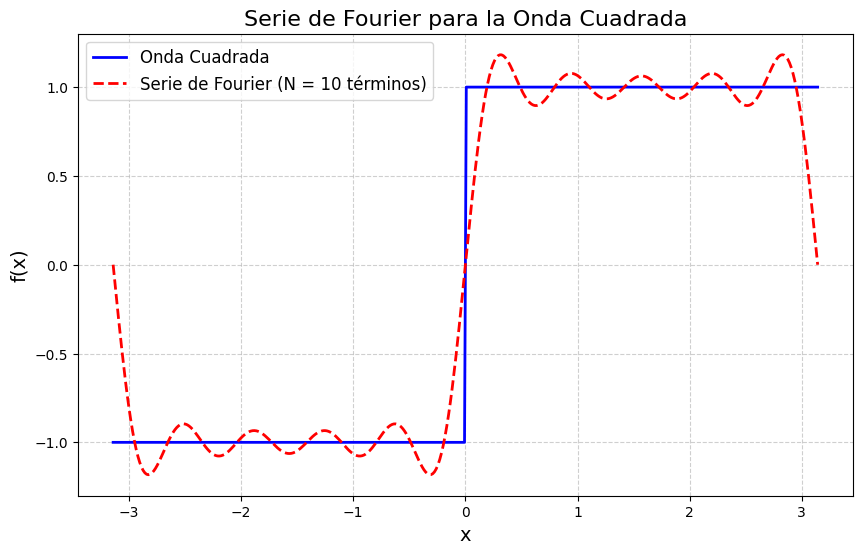

In [44]:
#10. Aproximacion series de fourier
def compute_fourier_coeffs(f, N, L=np.pi):
    """
    Calcula los coeficientes de Fourier para una función f definida en [-L, L].

    Parámetros:
      - f: función a analizar.
      - N: número de términos de la serie (se calcularán coeficientes para n = 1 a N).
      - L: semiperíodo (por defecto L = π, para funciones de periodo 2π).

    Retorna:
      - a0: coeficiente a0.
      - a: lista de coeficientes a_n para n = 1,...,N.
      - b: lista de coeficientes b_n para n = 1,...,N.

    Las fórmulas utilizadas son:
      \[
      a_0 = \frac{1}{L}\int_{-L}^{L} f(x)\,dx,\quad
      a_n = \frac{1}{L}\int_{-L}^{L} f(x)\cos\Bigl(\frac{n\pi x}{L}\Bigr)\,dx,\quad
      b_n = \frac{1}{L}\int_{-L}^{L} f(x)\sin\Bigl(\frac{n\pi x}{L}\Bigr)\,dx.
      \]
    """
    a0 = (1 / L) * quad(f, -L, L)[0]
    a, b = [], []
    for n in range(1, N+1):
        an = (1 / L) * quad(lambda x: f(x) * np.cos(n * np.pi * x / L), -L, L)[0]
        bn = (1 / L) * quad(lambda x: f(x) * np.sin(n * np.pi * x / L), -L, L)[0]
        a.append(an)
        b.append(bn)
    return a0, a, b

def fourier_series_approx(x, a0, a, b, L=np.pi):
    """
    Evalúa la aproximación de la serie de Fourier en el punto x.

    Parámetros:
      - x: valor (o array) donde evaluar la serie.
      - a0: coeficiente a0.
      - a: lista de coeficientes a_n.
      - b: lista de coeficientes b_n.
      - L: semiperíodo (por defecto L = π).

    Retorna:
      La aproximación de f(x) mediante la serie de Fourier:
      \[
      f_{\text{approx}}(x) = \frac{a_0}{2} + \sum_{n=1}^{N}\Bigl[a_n\cos\Bigl(\frac{n\pi x}{L}\Bigr) + b_n\sin\Bigl(\frac{n\pi x}{L}\Bigr)\Bigr].
      \]
    """
    sum_val = a0 / 2.0
    N = len(a)
    for n in range(1, N+1):
        sum_val += a[n-1] * np.cos(n * np.pi * x / L) + b[n-1] * np.sin(n * np.pi * x / L)
    return sum_val


# Ejemplo 1: f(x) = x
def f1(x):
    return x

N1 = 10  # Número de términos en la serie
a0_1, a_1, b_1 = compute_fourier_coeffs(f1, N1, L=np.pi)

x_vals = np.linspace(-np.pi, np.pi, 400)
f1_actual = f1(x_vals)
f1_approx = np.array([fourier_series_approx(x, a0_1, a_1, b_1, L=np.pi) for x in x_vals])

plt.figure(figsize=(10,6))
plt.plot(x_vals, f1_actual, label="f(x) = x", lw=2, color='blue')
plt.plot(x_vals, f1_approx, label=f"Serie de Fourier (N = {N1} términos)", lw=2, linestyle='--', color='red')
plt.title("Serie de Fourier para f(x) = x", fontsize=16)
plt.xlabel("x", fontsize=14)
plt.ylabel("f(x)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Ejemplo 2: f(x) = |x|
def f2(x):
    return np.abs(x)

N2 = 10
a0_2, a_2, b_2 = compute_fourier_coeffs(f2, N2, L=np.pi)

f2_actual = f2(x_vals)
f2_approx = np.array([fourier_series_approx(x, a0_2, a_2, b_2, L=np.pi) for x in x_vals])

plt.figure(figsize=(10,6))
plt.plot(x_vals, f2_actual, label="f(x) = |x|", lw=2, color='blue')
plt.plot(x_vals, f2_approx, label=f"Serie de Fourier (N = {N2} términos)", lw=2, linestyle='--', color='red')
plt.title("Serie de Fourier para f(x) = |x|", fontsize=16)
plt.xlabel("x", fontsize=14)
plt.ylabel("f(x)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


# Ejemplo 3: Onda cuadrada
def f3(x):
    # Definir f(x) = -1 para x in [-π, 0) y 1 para x in [0, π]
    # Ajustamos la periodicidad para x = 0 asignando f(0)=0.
    return np.where(x < 0, -1, np.where(x > 0, 1, 0))

N3 = 10
a0_3, a_3, b_3 = compute_fourier_coeffs(f3, N3, L=np.pi)

f3_actual = f3(x_vals)
f3_approx = np.array([fourier_series_approx(x, a0_3, a_3, b_3, L=np.pi) for x in x_vals])

plt.figure(figsize=(10,6))
plt.plot(x_vals, f3_actual, label="Onda Cuadrada", lw=2, color='blue')
plt.plot(x_vals, f3_approx, label=f"Serie de Fourier (N = {N3} términos)", lw=2, linestyle='--', color='red')
plt.title("Serie de Fourier para la Onda Cuadrada", fontsize=16)
plt.xlabel("x", fontsize=14)
plt.ylabel("f(x)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [42]:
#11. Fusionar Listas
def fusionar_listas_unicas(*listas):
    """
    Fusiona un número indeterminado de listas y devuelve una lista con todos los elementos únicos, sin repeticiones.

    Parámetros:
      * listas: Se pueden pasar varias listas como argumentos.

    Retorna:
      Una lista que contiene cada elemento único (en el orden en que aparece por primera vez).
    """
    elementos_vistos = set()
    lista_unica = []
    for lista in listas:
        for elemento in lista:
            if elemento not in elementos_vistos:
                elementos_vistos.add(elemento)
                lista_unica.append(elemento)
    return lista_unica

# Ejemplo 1:
# Fusionando dos listas de números
lista1 = [1, 2, 3, 4]
lista2 = [3, 4, 5, 6]
resultado1 = fusionar_listas_unicas(lista1, lista2)
print("Ejemplo 1:", resultado1)  # Resultado esperado: [1, 2, 3, 4, 5, 6]

# Ejemplo 2:
# Fusionando tres listas con elementos de tipo cadena
lista_a = ["manzana", "banana"]
lista_b = ["banana", "cereza", "manzana"]
lista_c = ["durazno", "pera"]
resultado2 = fusionar_listas_unicas(lista_a, lista_b, lista_c)
print("Ejemplo 2:", resultado2)  # Resultado esperado: ['manzana', 'banana', 'cereza', 'durazno', 'pera']

# Ejemplo 3:
# Fusionando listas con elementos repetidos
lista_x = [10, 20, 20, 30]
lista_y = [30, 40, 50]
lista_z = [50, 60, 10]
resultado3 = fusionar_listas_unicas(lista_x, lista_y, lista_z)
print("Ejemplo 3:", resultado3)  # Resultado esperado: [10, 20, 30, 40, 50, 60]


Ejemplo 1: [1, 2, 3, 4, 5, 6]
Ejemplo 2: ['manzana', 'banana', 'cereza', 'durazno', 'pera']
Ejemplo 3: [10, 20, 30, 40, 50, 60]
